# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

In [3]:
# make the dataframe
city_df = pd.DataFrame({"City":cities})

In [4]:
city_df.head()

,City
0,yabelo
1,albany
2,carnarvon
3,namatanai
4,bada


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Loop through the list of cities and perform request for data on each
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
MaxTemp = []
WindSpeed = []
total_cities = len(cities)

#Start the count
count = 0

# use iterrows to iterate through pandas dataframe
for city in cities:
    
    try:
        response = requests.get(f"{url}&q={city}").json() 
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        MaxTemp.append(response['main']['temp_max'])
        WindSpeed.append(response['wind']['speed'])
        city_record = response["name"]
        
        #Increase by 1 each time   
        count = count + 1
    
        time.sleep(1)
        
        # assemble url and make API request
        print(f"Processing Record {count}: {city}.")
        response = requests.get(url + city).json()
  
    
        

      
    except (KeyError, IndexError):
        print("Missing result... skipping.")
        
print("Beginning Data Retrieval")
print("-------------------------")


Processing Record 1: yabelo.
Processing Record 2: albany.
Processing Record 3: carnarvon.
Processing Record 4: namatanai.
Processing Record 5: bada.
Processing Record 6: ponta do sol.
Processing Record 7: avarua.
Processing Record 8: snasa.
Processing Record 9: vaini.
Processing Record 10: rikitea.
Processing Record 11: suez.
Processing Record 12: cape town.
Processing Record 13: balakovo.
Processing Record 14: yellowknife.
Processing Record 15: jamestown.
Processing Record 16: ushuaia.
Processing Record 17: darhan.
Processing Record 18: puerto ayora.
Missing result... skipping.
Processing Record 19: tasiilaq.
Missing result... skipping.
Processing Record 20: lavrentiya.
Processing Record 21: lokosovo.
Processing Record 22: yulara.
Processing Record 23: pevek.
Missing result... skipping.
Processing Record 24: tateyama.
Processing Record 25: hobyo.
Processing Record 26: isangel.
Processing Record 27: georgetown.
Processing Record 28: lakes entrance.
Processing Record 29: maragogi.
Proce

Processing Record 232: tamworth.
Processing Record 233: bata.
Processing Record 234: margate.
Processing Record 235: oktyabrskiy.
Processing Record 236: nioro.
Processing Record 237: oranjestad.
Missing result... skipping.
Processing Record 238: srandakan.
Processing Record 239: magadan.
Processing Record 240: faanui.
Processing Record 241: mount isa.
Processing Record 242: salinopolis.
Processing Record 243: narsaq.
Processing Record 244: barcelos.
Processing Record 245: kahului.
Processing Record 246: curup.
Processing Record 247: roma.
Processing Record 248: constitucion.
Processing Record 249: sao filipe.
Processing Record 250: sitka.
Processing Record 251: meulaboh.
Processing Record 252: chirongui.
Processing Record 253: kedrovyy.
Processing Record 254: dunedin.
Processing Record 255: vodnyy.
Processing Record 256: yar-sale.
Processing Record 257: katsuura.
Processing Record 258: sinnamary.
Processing Record 259: sovetskaya.
Missing result... skipping.
Processing Record 260: oist

Processing Record 457: derzhavinsk.
Missing result... skipping.
Processing Record 458: shu.
Processing Record 459: sioux lookout.
Processing Record 460: hambantota.
Processing Record 461: imbituba.
Processing Record 462: tonantins.
Processing Record 463: airai.
Processing Record 464: lubao.
Processing Record 465: abu kamal.
Processing Record 466: puerto narino.
Processing Record 467: lasa.
Processing Record 468: atambua.
Processing Record 469: ouadda.
Processing Record 470: senanga.
Processing Record 471: antalaha.
Processing Record 472: zarand.
Processing Record 473: port lincoln.
Processing Record 474: fohnsdorf.
Processing Record 475: ulan-ude.
Processing Record 476: florida ridge.
Processing Record 477: beloha.
Processing Record 478: balkhash.
Processing Record 479: san diego.
Processing Record 480: bull savanna.
Processing Record 481: skjervoy.
Processing Record 482: tromso.
Missing result... skipping.
Processing Record 483: lugovoy.
Processing Record 484: artesia.
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
#Create Dictonary to make table
city = {
    "City": city,
    "Cloudiness": Cloudiness, 
    "Country": Country,
    "Date": Date, 
    "Humidity": Humidity,
    "Lat": Lat, 
    "Lng": Lng, 
    "Max Temp": MaxTemp,
    "Wind Speed": WindSpeed
}

city_table = pd.DataFrame(city)

#Display table
city_table.count()

City          532
Cloudiness    532
Country       532
Date          532
Humidity      532
Lat           532
Lng           532
Max Temp      532
Wind Speed    532
dtype: int64

In [26]:
city_table.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,krasnyy chikoy,8,ET,1549489329,38,4.89,38.09,72.94,8.86
1,krasnyy chikoy,90,US,1549488480,75,42.65,-73.75,39.92,4.70
2,krasnyy chikoy,0,ZA,1549489069,22,-30.97,22.13,75.64,12.88
3,krasnyy chikoy,68,PG,1549489334,100,-3.66,152.44,81.22,13.60
4,krasnyy chikoy,0,NG,1549489336,29,12.41,4.51,72.67,10.76


In [ ]:
export_csv = city_table.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

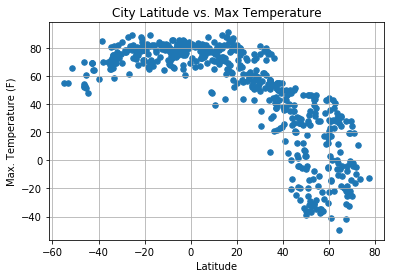

In [37]:
# Build a scatter plot for Latitude vs Temperature
plt.scatter(city_table["Lat"], city_table["Max Temp"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_Temp_Plot.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

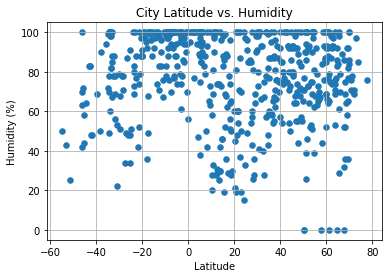

In [38]:
# Build a scatter plot for Latitude vs. Humidity 
plt.scatter(city_table["Lat"], city_table["Humidity"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_Humidity_Plot.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

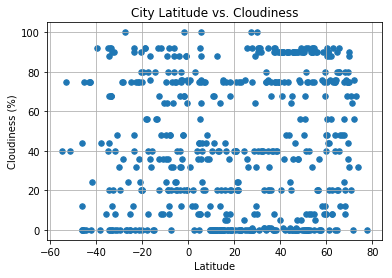

In [41]:
# Build a scatter plot for Latitude vs Cloudiness
plt.scatter(city_table["Lat"], city_table["Cloudiness"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_Cloudiness_Plot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

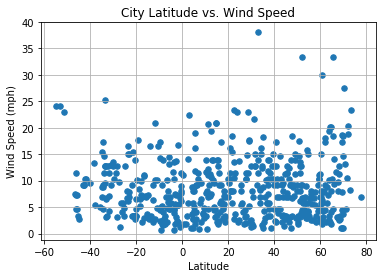

In [42]:
# Build a scatter plot for Latitude vs Wind Speed
plt.scatter(city_table["Lat"], city_table["Wind Speed"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_WindSpeed_plot.png")

# Show plot
plt.show()